# Surprise Housing price prediction
### By Sai Sasanka


In [40]:
# importing the required libraries

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [41]:
# Setting a few display options

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [42]:
# Reading the dataset

df = pd.read_csv("train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [43]:
# Looking at the info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

This dataset has missing values in some of the columns, proceeding towards missing value treatment

## 1. Treating Missing Values

In [44]:
# Looking at the column wise percentage of missing values

missing_vals = (df.isnull().sum() / df.shape[0]) * 100

missing_vals[missing_vals > 0]

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

We may notice that a few columns have missing values greater than 80 %, choosing to drop these columns

In [45]:
# Dropping columns with missing values greater than 80 %

to_drop = list(missing_vals[missing_vals > 80].index)

df.drop(columns=to_drop, inplace=True)

In [46]:
# Looking at the missing values again

missing_vals = (df.isnull().sum() / df.shape[0]) * 100

missing_vals[missing_vals > 0]

LotFrontage     17.739726
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
dtype: float64

In [47]:
# Looking at "FireplaceQu" column

df.FireplaceQu.value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

For Fire place quality missing, we have to check if fireplace exists in the house in the first place

In [48]:
# Looking if fireplace exists or not for the missing values in "FireplaceQu"

df[df.FireplaceQu.isnull()].Fireplaces.value_counts()

0    690
Name: Fireplaces, dtype: int64

So, FireplaceQu is null where there are no fireplaces, We will replace the missing values with "NA" (acc. to data definition)

In [49]:
# Replacing missing values in FireplaceQu with "NA"

df.loc[df.FireplaceQu.isnull(), "FireplaceQu"] = "NA" 

In [50]:
# Checking if the replacement is successfull

print(df.FireplaceQu.isnull().sum())

print(df.FireplaceQu.value_counts())

0
NA    690
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64


In [51]:
# Replacing the missing values in "LotFrontage" with median for now...... (NA in csv)

df.loc[df.LotFrontage.isnull(), "LotFrontage"] = df.LotFrontage.median()

df.LotFrontage.isnull().sum()

0

 ### Checkpoint for Lot Frontage missing values treatment

In [52]:
# Looking the "Garage" columns

g_cols = ["GarageType", "GarageYrBlt", "GarageFinish", "GarageQual", "GarageCond"]

for col in g_cols:
    print(df[df[col].isnull()].GarageCars.value_counts())
    print(df[df[col].isnull()].GarageArea.value_counts())    

0    81
Name: GarageCars, dtype: int64
0    81
Name: GarageArea, dtype: int64
0    81
Name: GarageCars, dtype: int64
0    81
Name: GarageArea, dtype: int64
0    81
Name: GarageCars, dtype: int64
0    81
Name: GarageArea, dtype: int64
0    81
Name: GarageCars, dtype: int64
0    81
Name: GarageArea, dtype: int64
0    81
Name: GarageCars, dtype: int64
0    81
Name: GarageArea, dtype: int64


Looking at the above results, we can say that the missing values are due to inavailability of Garage in the house

In [53]:
# Replacing the missing values in the Garage columns with "NA"

for col in g_cols:
    df.loc[df[col].isnull(), col] = "NA"

In [54]:
# checking if the replacement is successfull

df[g_cols].isnull().sum()

GarageType      0
GarageYrBlt     0
GarageFinish    0
GarageQual      0
GarageCond      0
dtype: int64

In [55]:
# A few columns have 0.5 to 2 % missing values, choosing to drop the rows

to_drop_rows = ["MasVnrType",  
                "MasVnrArea",  
                "BsmtQual",    
                "BsmtCond",    
                "BsmtExposure",
                "BsmtFinType1",
                "BsmtFinType2",
                "Electrical"]

for col in to_drop_rows:
    df = df[~df[col].isnull()]

df.shape

(1412, 77)

In [56]:
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

Missing values have been treated

## 2. Variable transformation

 - We have some columns which are cardinal categorical and yet for convenience have been represented using integers which then appear to be ordinal categorical
 - We will map the appropriate categories to the integers in those columns

In [60]:
# Looking at MSSubClass column

mapper = {
    20 : "1_STORY_1946_NEWER",
    30 : "1_STORY_1945_OLDER",
    40 : "1_STORY_FINISHED_ATTIC",
    45 : "1_1/2_STORY_UNFINISHED",
    50 : "1_1/2_STORY_FINISHED",
    60 : "2_STORY_1946_NEWER",
    70 : "2_STORY_1945_OLDER",
    75 : "2_1/2_STORY",
    80 : "SPLIT_OR_MULTI-LEVEL",
    85 : "SPLIT_FOYER",
    90 : "DUPLEX",
    120 : "1_STORY_PUD_1946_NEWER",
    150 : "1_1/2_STORY_PUD",
    160 : "2_STORY_PUD_1946_NEWER",
    180 : "PUD_MULTI_SPLIT_FOYER",
    190 : "2_FAMILY_CONVERSION"
}

df["MSSubClass"] = df.MSSubClass.map(mapper)

df.MSSubClass.value_counts()

1_STORY_1946_NEWER        515
2_STORY_1946_NEWER        294
1_1/2_STORY_FINISHED      141
1_STORY_PUD_1946_NEWER     86
1_STORY_1945_OLDER         69
2_STORY_PUD_1946_NEWER     63
2_STORY_1945_OLDER         60
SPLIT_OR_MULTI-LEVEL       57
DUPLEX                     38
2_FAMILY_CONVERSION        28
SPLIT_FOYER                19
2_1/2_STORY                16
1_1/2_STORY_UNFINISHED     12
PUD_MULTI_SPLIT_FOYER      10
1_STORY_FINISHED_ATTIC      4
Name: MSSubClass, dtype: int64

In [62]:
# Looking at OverallQual column

mapper = {
   10 : "Very Excellent",
   9 : "Excellent",
   8 : "Very Good",
   7 : "Good",
   6 : "Above Average",
   5 : "Average",
   4 : "Below Average",
   3 : "Fair",
   2 : "Poor",
   1 : "Very Poor"
}

df["OverallQual"] = df.OverallQual.map(mapper)

df.OverallQual.value_counts()

Average           381
Above Average     371
Good              313
Very Good         166
Below Average     103
Excellent          43
Very Excellent     17
Fair               14
Poor                3
Very Poor           1
Name: OverallQual, dtype: int64

In [63]:
# Looking at OverallCond column

df["OverallCond"] = df.OverallCond.map(mapper)

df.OverallCond.value_counts()

Average          792
Above Average    248
Good             200
Very Good         72
Below Average     52
Excellent         22
Fair              20
Poor               5
Very Poor          1
Name: OverallCond, dtype: int64

In [65]:
# Looking at CentralAir column
# It has values N, Y indicating a binary column, we will map these values to 0, 1

df["CentralAir"] = df.CentralAir.map({"N" : 0, "Y" : 1})

df.CentralAir.value_counts()

1    1331
0      81
Name: CentralAir, dtype: int64

### 2.1 Inspecting a few variables for potential Binning

Identifying variables which appear to be ordinal categorical, these have to be converted to cardinal categorical so that dummy variable creation
can be accurate

In [73]:
# Looking at BsmtFullBath

df.BsmtFullBath.value_counts()

0    815
1    581
2     15
3      1
Name: BsmtFullBath, dtype: int64

In [74]:
# Looking at BsmtHalfBath

df.BsmtHalfBath.value_counts()

0    1330
1      80
2       2
Name: BsmtHalfBath, dtype: int64

In [ ]:
# Looking at FullBath

df.FullBath.value_counts()

In [ ]:
# Looking at HalfBath

df.HalfBath.value_counts()

In [75]:
# Looking at BedroomAbvGr

df.BedroomAbvGr.value_counts()

3    790
2    339
4    201
1     48
5     21
6      6
0      6
8      1
Name: BedroomAbvGr, dtype: int64

In [76]:
# Looking at Kitchen

df.KitchenAbvGr.value_counts()

1    1361
2      48
3       2
0       1
Name: KitchenAbvGr, dtype: int64

In [77]:
# Looking at TotRmsAbvGrd

df.TotRmsAbvGrd.value_counts()

6     393
7     316
5     268
8     180
4      92
9      72
10     46
11     18
3      16
12     10
14      1
Name: TotRmsAbvGrd, dtype: int64

In [78]:
# Looking at Fireplaces

df.Fireplaces.value_counts()

0    657
1    638
2    112
3      5
Name: Fireplaces, dtype: int64

In [79]:
# Looking at GarageCars

df.GarageCars.value_counts()

2    793
1    361
3    179
0     74
4      5
Name: GarageCars, dtype: int64

## Outlier Analysis

In [66]:
# Picking out all the continuous columns for outlier analysis

continuous_df = df.select_dtypes(include=["float64", "int64"])

continuous_df.head()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,65.0,8450,2003,2003,196.0,706,0,150,856,1,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,80.0,9600,1976,1976,0.0,978,0,284,1262,1,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,68.0,11250,2001,2002,162.0,486,0,434,920,1,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,60.0,9550,1915,1970,0.0,216,0,540,756,1,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,84.0,14260,2000,2000,350.0,655,0,490,1145,1,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,2008,250000


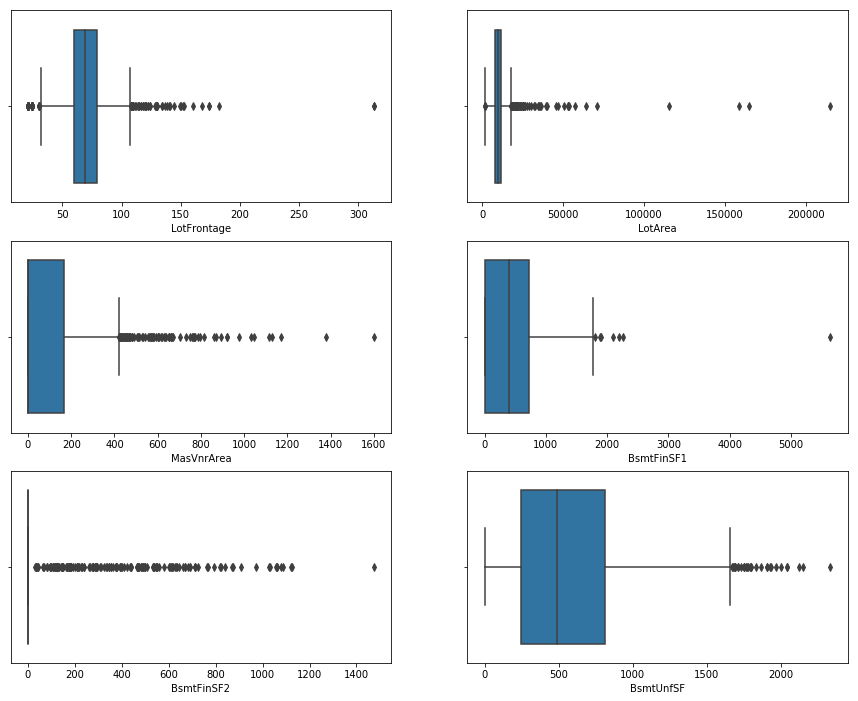

In [71]:
# Box plots for a few columns

plt.figure(figsize=(15, 12))

plt.subplot(3, 2, 1)
sns.boxplot(df.LotFrontage)

plt.subplot(3, 2, 2)
sns.boxplot(df.LotArea)

plt.subplot(3, 2, 3)
sns.boxplot(df.MasVnrArea)

plt.subplot(3, 2, 4)
sns.boxplot(df.BsmtFinSF1)

plt.subplot(3, 2, 5)
sns.boxplot(df.BsmtFinSF2)

plt.subplot(3, 2, 6)
sns.boxplot(df.BsmtUnfSF)

plt.show()

Write insights ---------------

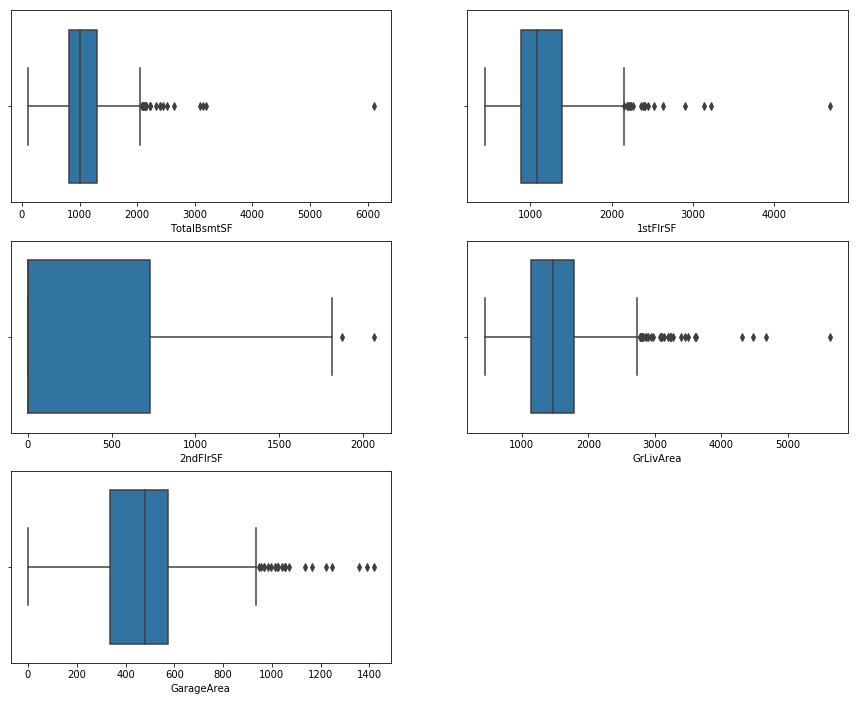

In [72]:
# Box plots for a few other columns

plt.figure(figsize=(15, 12))

plt.subplot(3, 2, 1)
sns.boxplot(df.TotalBsmtSF)

plt.subplot(3, 2, 2)
sns.boxplot(df["1stFlrSF"])

plt.subplot(3, 2, 3)
sns.boxplot(df["2ndFlrSF"])

plt.subplot(3, 2, 4)
sns.boxplot(df.GrLivArea)

plt.subplot(3, 2, 5)
sns.boxplot(df.GarageArea)

plt.show()

Write insights ----------

## Correlation

 - Since we are using regression method to model this data, it is essential to check for columns that are correlated with the target variable
 - This can also be helpful to suggest if PCA can be used for dimensionality reduction

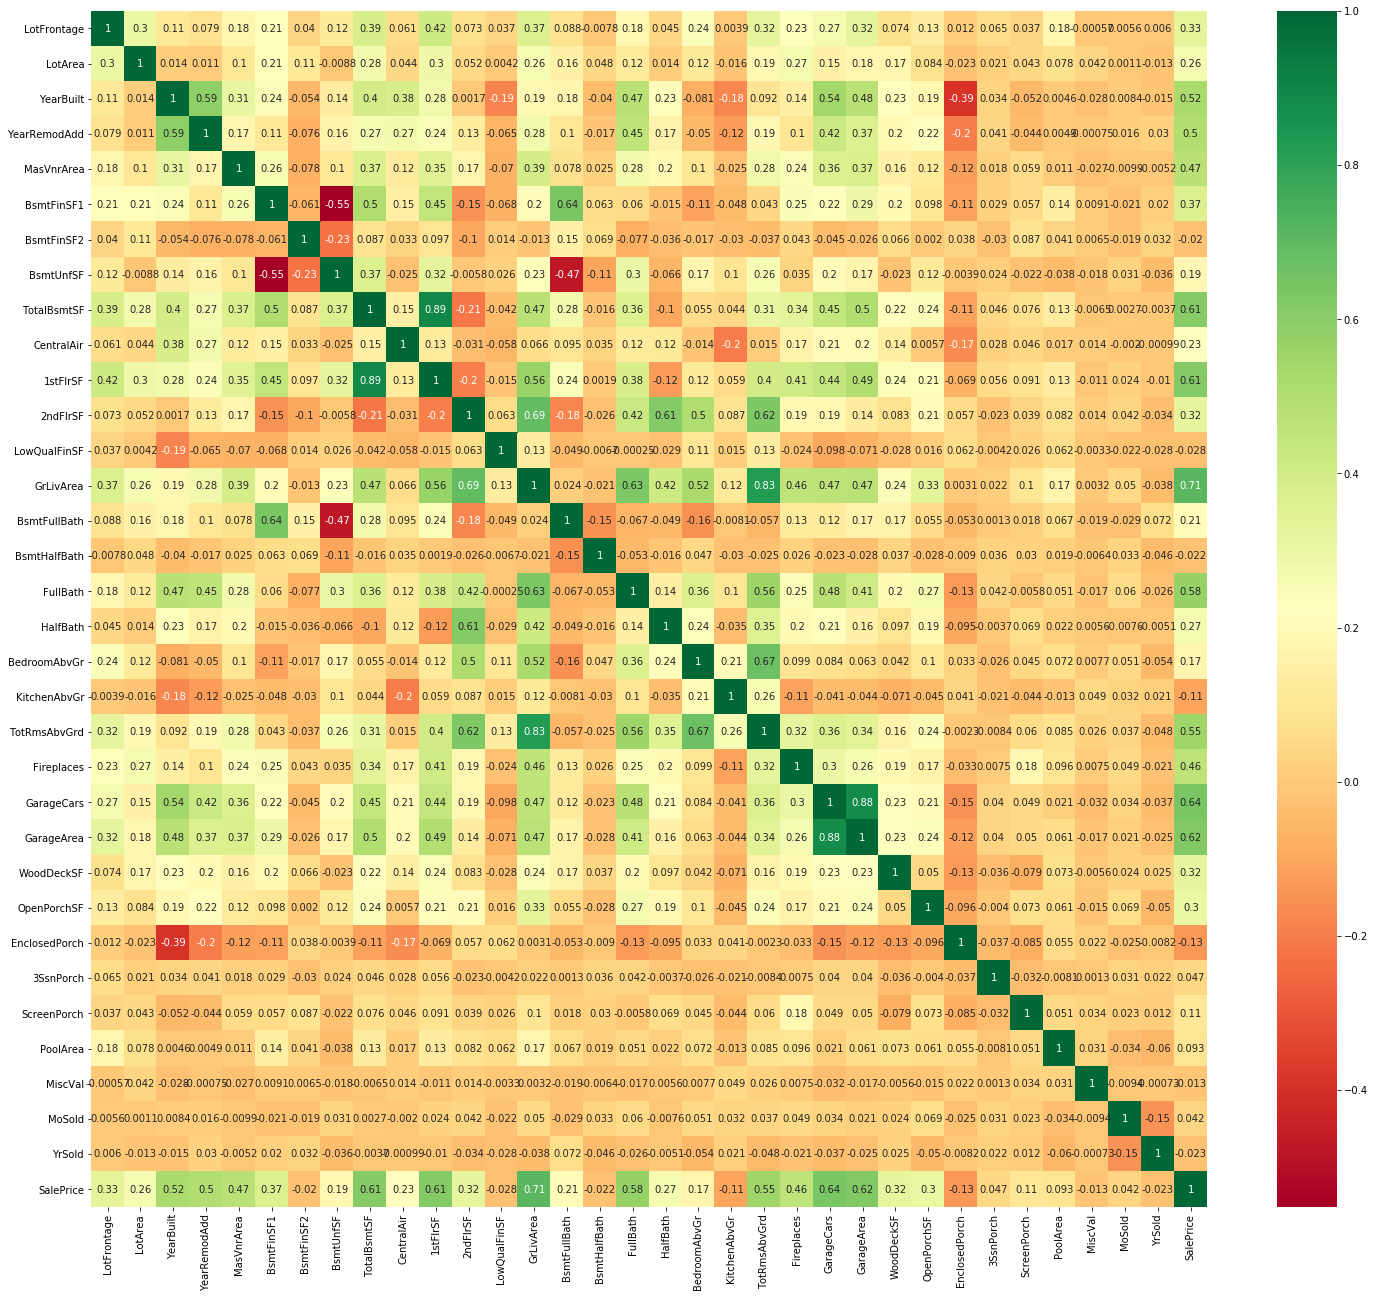

In [69]:
# Plotting the correlation heatmap

plt.figure(figsize=(25, 22))

sns.heatmap(continuous_df[continuous_df.columns.drop("Id")].corr(), annot=True, cmap="RdYlGn")
plt.show()

Here we can see that variables such as 
- GrLivArea, GarageCars, GarageArea are noticeably correlated with the target variable "SalePrice"
- GarageCars and GarageArea are highly positively correlated (0.88)
- GrLivArea and TotRmsAbvGrd are highly correlated as well (0.83)

With this information we now know that we can proceed with Linear Regression